# Ejercicios

# Primer Ejercicio: Gráficas de coeficiente de atenuación lineal

En este ejercicio se quieren graficar los coeficientes de atenuación de la hidroxiapatita de calcio, PMMA, Al2O3, breast tissue y CaC2O4. Un ejemplo ya se mostró en el cuaderno de Jupyter con la teoría para esta clase, pero solo con el PMMA. Los datos de coeficiente de atenuación y energías se encuentran en los archivos Al2O3.txt, breast_tissue.txt, CaC2O4.txt, HA.txt y pmma.txt. La primera columna de datos de cada txt contiene las energías en MeV y la segunda los coeficientes de atenuación DE MASA en $cm^2/g$ (no los lineales). **De la tercera columna de datos nos vamos a olvidar**. Para pasar del coeficiente de atenuación de masa al lineal basta con multiplicar los datos de coeficiente de atenuación de masa por la densidad del material. Las densidades de cada uno de los materiales ya se encuentran en la celda de código de abajo. 

El resultado de este ejercicio debe ser una gráfica de coeficiente de atenuación lineal en el eje vertical y energía (en keV) en el eje horizontal. Para pasar las energías de MeV a keV basta con multiplicar los datos de energía en MeV por 1000. Como requisitos para la gráfica debe tener

- Título
- Nombre de los ejes 
- Cuadro de leyendas
- Cada linea debe tener distinto color
- Debe tener una rejilla (lo recomendable es activar la rejilla con plt.grid() antes de poner los ejes logaritmicos)
- El eje x debe estar mínimo en 5 y máximo en 30
- El eje y debe estar mínimo en 20 y máximo en 200000

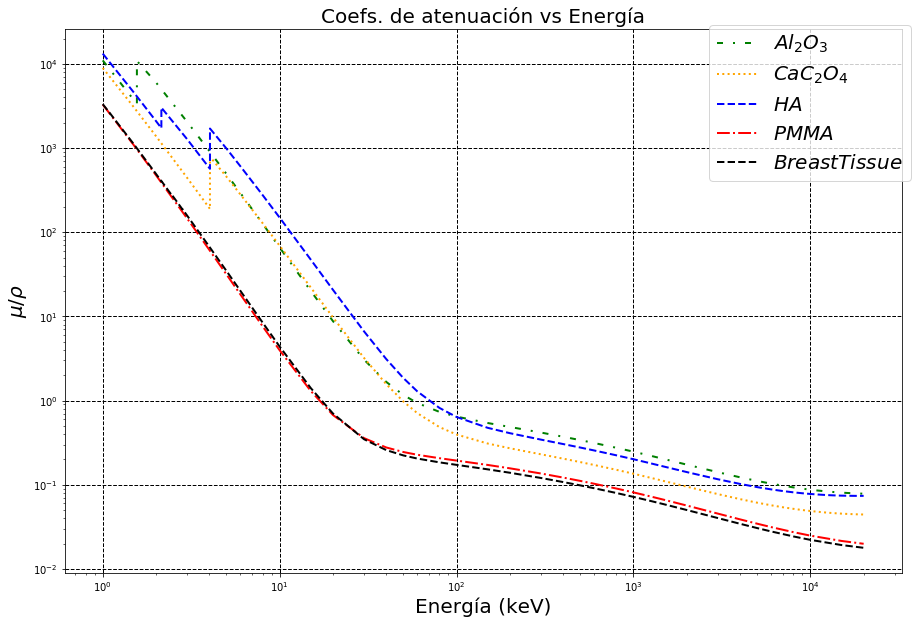

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

# De acá en adelante se hará el código

densidad_Al2O3 = 3.95 # g/cm3
densidad_CaC2O4 = 2.12 # g/cm3
densidad_HA = 3.16 # g/cm3
densidad_PMMA = 1.18 # g/cm3
densidad_bt = 1.02 # g/cm3 # Sacado de physics.nist.gov/PhysRefData/XrayMassCoef/tab2.html


# Cargamos los datos del archivo "___.txt". La primera columna de datos es la energía en MeV y la segunda es el coeficiente de atenuación de masa (mu/rho) en cm2/g
datos_Al2O3 = np.genfromtxt("Al2O3.txt") 
datos_CaC2O4 = np.genfromtxt("CaC2O4.txt")
datos_HA = np.genfromtxt("HA.txt")
datos_PMMA = np.genfromtxt("pmma.txt")
datos_bt = np.genfromtxt("breast_tissue.txt")

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

energia_MeV_Al2O3 = datos_Al2O3[:,0] #Obtenemos la primera columna de nuestra matriz de datos, la cual corresponde con la energía en MeV
mu_masa_Al2O3 = datos_Al2O3[:,1] #Obtenemos la segunda columna de nuestra matriz de datos, la cual corresponde con el coeficiente de atenuación de masa (mu/rho) en cm2/g

energia_MeV_CaC2O4 = datos_CaC2O4[:,0]
mu_masa_CaC2O4 = datos_CaC2O4[:,1]

energia_MeV_HA = datos_HA[:,0]
mu_masa_HA = datos_HA[:,1]

energia_MeV_PMMA = datos_PMMA[:,0]
mu_masa_PMMA = datos_PMMA[:,1]

energia_MeV_bt = datos_bt[:,0]
mu_masa_bt = datos_bt[:,1]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

energia_keV_Al2O3 = energia_MeV_Al2O3*1000 # Obtenemos la energía en keV
mu_lineal_Al2O3 = mu_masa_Al2O3*densidad_Al2O3 # Obtenemos el coeficiente de atenuación lineal

energia_keV_CaC2O4 = energia_MeV_CaC2O4*1000
mu_lineal_CaC2O4 = mu_masa_CaC2O4*densidad_CaC2O4

energia_keV_HA = energia_MeV_HA*1000
mu_lineal_HA = mu_masa_HA*densidad_HA

energia_keV_PMMA = energia_MeV_PMMA*1000
mu_lineal_PMMA = mu_masa_PMMA*densidad_PMMA

energia_keV_bt = energia_MeV_bt*1000
mu_lineal_bt = mu_masa_bt*densidad_bt

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(15,10)) # Creamos la figura de tamaño 15 x 10 en unidades de Python

plt.grid(b=True, linestyle="--", color="black", linewidth=1) # Creamos la rejilla. b=True indica que activamos la opción de que la rejilla aparezca en la gráfica. Con linestyle="--" El estílo de la línea será de líneas cortadas. Con linewidth=1 se modifica el ancho de la línea. Entre más grande el número más ancha es la línea

plt.plot(energia_keV_Al2O3, mu_lineal_Al2O3, color="green", linestyle=(0, (3, 5, 1, 5)), linewidth=2, label=r"$Al_2 O_3$") # Graficamos los coeficientes de atenuación
plt.plot(energia_keV_CaC2O4, mu_lineal_CaC2O4, color="orange", linestyle="dotted", linewidth=2, label=r"$CaC_2 O_4$")
plt.plot(energia_keV_HA, mu_lineal_HA, color="blue", linestyle="--", linewidth=2, label=r"$HA$")
plt.plot(energia_keV_PMMA, mu_lineal_PMMA, color="red", linestyle="-.", linewidth=2, label=r"$PMMA$")
plt.plot(energia_keV_bt, mu_lineal_bt, color="black", linestyle="--", linewidth=2, label=r"$Breast Tissue$")

#plt.xlim(xmin=5, xmax=30)
#plt.ylim(xmin=20, ymax=200000)

plt.title("Coefs. de atenuación vs Energía", fontsize=20) # Creamos el titulo
plt.xlabel("Energía (keV)", fontsize=20) # Nombre del eje x
plt.ylabel(r"$\mu/\rho$", fontsize=20) # Nombre del eje y
plt.legend(loc=(0.77,0.72), fontsize=20) # Activamos el cuadro de leyendas

plt.xscale("log") # Exigimos que el eje x tenga escala logarítmica
plt.yscale("log") # Exigimos que el eje y tenga escala logarítmica

plt.show()


## Segundo Ejercicio: Tiling y uso de histogramas

Para el segundo ejercicio vamos a ver cómo a partir de imágenes más pequeñas se puede formar una más grande. Esta acción se conoce como tiling o "embaldosado". Posterior al tiling vamos a visualizar la imagen y, de ser necesario, si la imagen parece tener pixeles muy saturados (con intensidades muy altas), hay que usar histogramas para ver el verdadero rango de intensidades en el que está la imagen. Para esto se seguirán los siguientes pasos:

- Juntar las cuatro imágenes en una sola (Hacer el tiling). Cada imagen tiene un tamaño de $128\times128$ pixeles. 
- Graficar la imagen total obtenida en el punto anterior
- Si la imagen parece tener pixeles muy saturados (con intensidades muy altas), obtener el histograma de la imagen y con él ver el rango óptimo de valores para los cuales seguramente podremos ver la imagen clara, sin saturaciones.
- Graficar la imagen en el nuevo rango de intensidades encontrado anteriormente
- Seleccionar en un rectángulo rojo sin relleno las dos filas inferiores de microcalcificaciones

Algunos tips para el punto son:

- Para el tiling: Yo puedo hacer que un pedazo de una matriz se iguale a una matriz pequeña de la siguiente forma: Matriz_grande\[0:128,0:128\] = Matriz_pequena. En el anterior código yo exijo que el trozo de Matriz_grande que va desde i=0 hasta i=127 y de j=0 hasta j=127 sea igual a la Matriz_pequena. Obviamente la Matriz_pequena debe tener el tamaño apropiado para que esto pueda ejecutarse sin ningún error.
- El numero de bins del histograma puede ajustarse a gusto, esto con tal de que el histograma sea más "bonito".
- Para crear una matriz de ceros de $n\times m$ pixeles basta con hacer matriz = np.zeros((n,m))

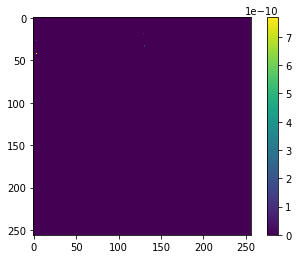

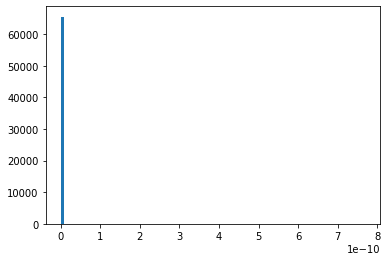

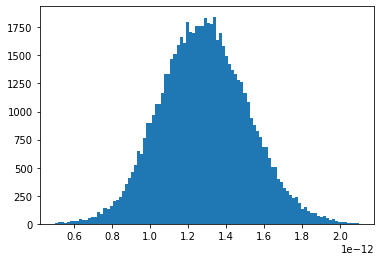

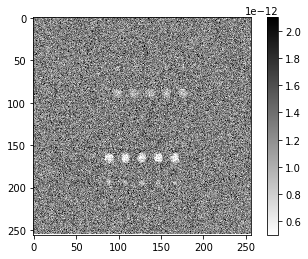

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 

# Desde acá comienza el código


imagen_superior_izquierda = np.genfromtxt("superior_izquierda.txt") # Cargamos los datos del archivo "superior_izquierda.txt"
imagen_superior_derecha = np.genfromtxt("superior_derecha.txt") 
imagen_inferior_izquierda = np.genfromtxt("inferior_izquierda.txt") 
imagen_inferior_derecha = np.genfromtxt("inferior_derecha.txt") 

matriz = np.zeros((256,256)) # Creamos una matriz de ceros

matriz[0:128, 0:128] = imagen_superior_izquierda # Igualamos una matriz pequeña a un pedazo de una matriz más grande
matriz[0:128, 128:256] = imagen_superior_derecha
matriz[127:255, 0:128] = imagen_inferior_izquierda
matriz[127:255, 128:256] = imagen_inferior_derecha

plt.imshow(matriz) # Se grafica la imagen
plt.colorbar() # Se agrega la barra de colores
plt.show()

plt.hist(matriz.ravel(), bins=100) # Se grafica el histograma de la imagen con 100 bins (barritas)
plt.show()

plt.hist(matriz.ravel(), bins=100, range=(0.5e-12, 2.1e-12)) # Se grafica el histograma de la imagen con 100 bins (barritas) y con un rango en el eje horizontal acotado 
plt.show() 

plt.imshow(matriz, cmap="binary",vmin=0.5e-12, vmax=2.1e-12) # Se grafica la imagen con un mapa de color "Greys" (escala de grises). Se fija la escala de colores con la opcion vmin y vmax.
colorbar=plt.colorbar() # Se agrega la barra de colores
plt.show() 

## Tercer ejercicio: Corrección de imagenes

En este ejercicio vamos a obtener una imagen corregida a partir de un conjunto de RAW y de FF. Para esto se van a seguir los siguientes pasos:

- Cargar todas las imágenes RAW (Las que empiezan con "Fantoma1_Rosado") y todas las FF (Las que empiezan con "Fantoma1_FF") y guardarlas en dos arrays independientes
- Sumar los elementos del array de imágenes RAW y promediar los elementos del array de imágenes FF 
- Obtener la imagen corregida: FF/RAW 
- Graficar la imagen corregida 
- Graficar el histograma de la imagen corregida y establecer el rango de intensidades para el cual la imagen corregida se podría visualizar mejor
- Graficar la imagen corregida con el rango de intensidades encontrado en el inciso anterior
- Guardar en un txt la imagen corregida.

Pista máxima para el punto: Se puede usar un punto de los ejercicios de la primera clase para este código! 

C:\Users\Paula\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Paula\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


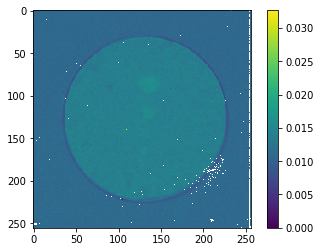

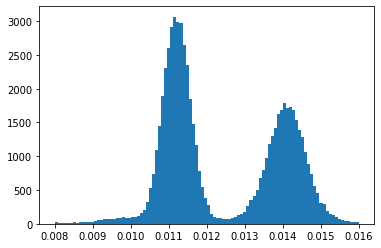

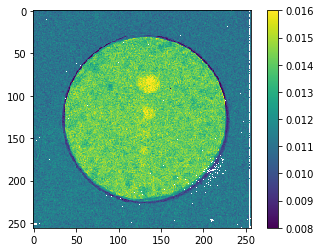

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

# Desde acá comienza el código


# 1) Se cargan las imágenes RAW y FF y se guardan en dos arrays independientes

lista_imagenes = os.listdir() # Se obtienen los nombres de todos los archivos que se encuentran dentro de la carpeta que contiene a este cuaderno de Python y se guardan en una lista 
lista_imagenes_RAW = []
lista_imagenes_FF = []

for elem in lista_imagenes:
    if(elem.startswith("Fantoma1_Rosado") == True):
        imagen_RAW = np.genfromtxt(elem)
        lista_imagenes_RAW.append(imagen_RAW)
    elif(elem.startswith("Fantoma1_FF") == True):
        imagen_FF = np.genfromtxt(elem)
        lista_imagenes_FF.append(imagen_FF)

imagenes_RAW = np.array(lista_imagenes_RAW)
imagenes_FF = np.array(lista_imagenes_FF)


# 2) Se suman los elementos del array de imágenes RAW y se promedian los elementos del array de imágenes FF

RAW_total = np.sum(imagenes_RAW, axis=0)
FF_total = np.mean(imagenes_FF, axis=0)


# 3) Se obtiene la imagen corregida: FF/RAW

imagen_corregida = FF_total/RAW_total


# 4) Se grafica la imagen corregida

plt.imshow(imagen_corregida)
plt.colorbar()
plt.show()


# 5) Se grafica el histograma de la imagen corregida y se establece el rango de intensidades para el cual la imagen corregida se podría visualizar mejor

plt.hist(imagen_corregida.ravel(), bins=100, range=(0.008,0.016)) # Se grafica el histograma de la imagen con 100 bins (barritas). OBLIGATORIO en este caso establecer un rango al hacer el histograma ya que RAW_total puede tener ceros y por lo tanto imagen_corregida valores infinitos!
plt.show()


# 6) Graficar la imagen corregida con el rango de intensidades encontrado en el inciso anterior

plt.imshow(imagen_corregida, cmap="viridis",vmin=0.008, vmax=0.016) # Se grafica la imagen. Se fija la escala de colores con la opcion vmin y vmax
colorbar=plt.colorbar() # Se agrega la barra de colores
plt.show() 
 

# 7) Guardar en un txt la imagen corregida

np.savetxt("imagen_corregida.txt", imagen_corregida)